# Survival Analysis on IBM Dataset

-----------------------------------------------------------------------------------------------------------------------------------------------

#### [Kaggle Dataset - IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

##### Import libraries

In [161]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [162]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [163]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Check for missing values

In [164]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [165]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### Remove unnecessary columns from the Dataset

In [166]:
# We can see that employee count is 1 for all the rows in the column so I have will remove that column as it is not helpful in further analysis
# Employee Number is unique for each and every employee and is not very useful in Analysis.
# StandardHours is same for each employee and doesnt really help identify employee attrition.

(df['EmployeeCount'] == 1).sum()
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

##### Check each column values and variation.

In [167]:
for x in df.columns:
    if df[x].dtype == 'object':
        print(df[x].value_counts())
    else:
        print(f'{x}:  Min:- {min(df[x])}, Max:- {max(df[x])}')
    print('----------------------------------------------------------------------')

Age:  Min:- 18, Max:- 60
----------------------------------------------------------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------------------------------------
DailyRate:  Min:- 102, Max:- 1499
----------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------------------------------------
DistanceFromHome:  Min:- 1, Max:- 29
----------------------------------------------------------------------
Education:  Min:- 1, Max:- 5
----------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing

In [168]:
# df.describe()
df[df.columns[:20]].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [169]:
df[df.columns[20:]].describe()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### Changing categorical values to numerical for Attrition

In [170]:
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

##### Lets check what features are most influencial for Attrition by using RandonForestClassifier

In [171]:
new_df = df.copy()
for x in new_df.columns:
    if new_df[x].dtype == 'object':
        print(f'Converting column {x} from categorical to numerical')
        new_df[x] = LabelEncoder().fit_transform(new_df[x])

cox_df = new_df.copy()

Converting column BusinessTravel from categorical to numerical
Converting column Department from categorical to numerical
Converting column EducationField from categorical to numerical
Converting column Gender from categorical to numerical
Converting column JobRole from categorical to numerical
Converting column MaritalStatus from categorical to numerical
Converting column Over18 from categorical to numerical
Converting column OverTime from categorical to numerical


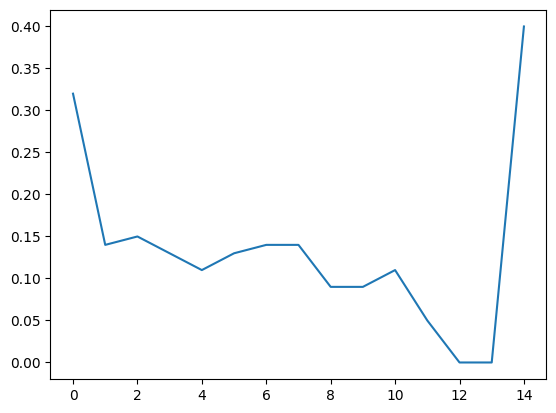

In [172]:
x_val = []
y_val = []
for x in range(0,15):
    attrition = df[df['YearsWithCurrManager'] == x]['Attrition']
    x_val.append(x)
    y_val.append(round(attrition.sum()/attrition.count(),2))
plt.plot(x_val, y_val)
    

In [173]:
from sklearn.ensemble import RandomForestClassifier
X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

fig = px.histogram(feature_importance_df, y="Feature",x="Importance",width=600, height=600)
fig.show()

##### Visualization:- Lets see how each feature interacts with attrition.

In [174]:
fig = px.histogram(df, x="MonthlyIncome",color='Attrition', marginal="violin",width=600, height=600, text_auto=True)
fig.show()

- As we can see in the above plot the attrition is more for employees which have a less income as compared to the employees having higher Income.

In [175]:
fig = px.histogram(df, x="Age", color='Attrition',marginal="box",width=600, height=600)
fig.show()

In [176]:
fig = px.histogram(df, x="NumCompaniesWorked", color='Attrition', marginal='violin',width=600, height=600)
fig.show()

-----------------------------------------------------------------------------------------------------------------------------------------------

## Kaplan Meier Survival Curve
- The Kaplan-Meier estimator is a non-parametric method for estimating the survival function. 
- It is suitable for censored data, where some observations may not experience the event of interest.
- It is used to find the probability of survival over a period of time.

In [177]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = df['YearsAtCompany'], event_observed=df['Attrition'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1470 total observations, 1233 right-censored observations>

Text(0, 0.5, 'Porbability of Survival')

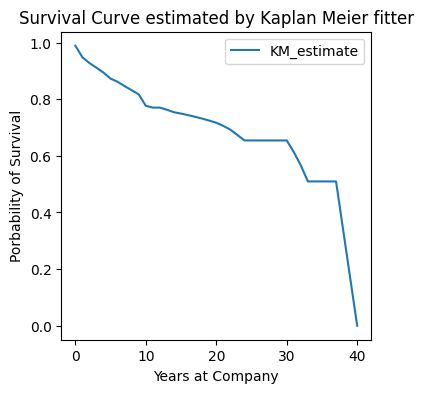

In [178]:
kmf.survival_function_.plot(figsize=(4,4))
plt.title('Survival Curve estimated by Kaplan Meier fitter')
plt.xlabel('Years at Company')
plt.ylabel('Porbability of Survival')

([<matplotlib.axis.YTick at 0x14efacd7b10>,
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

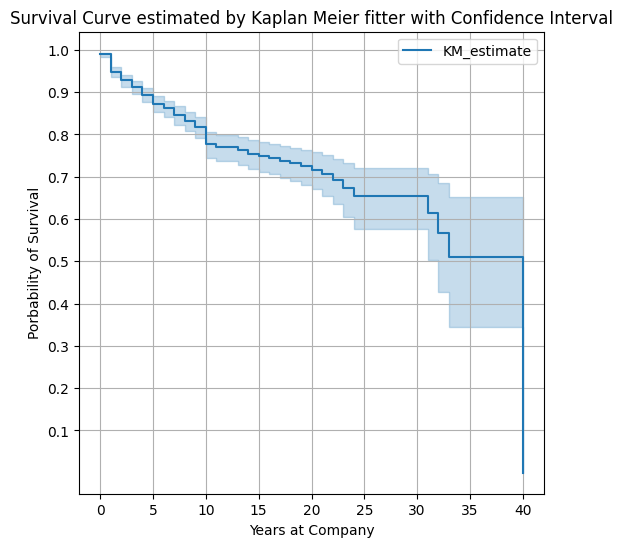

In [179]:
kmf.plot_survival_function(figsize=(6,6))
plt.title('Survival Curve estimated by Kaplan Meier fitter with Confidence Interval')
plt.xlabel('Years at Company')
plt.ylabel('Porbability of Survival')
plt.grid(visible=True)
plt.yticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

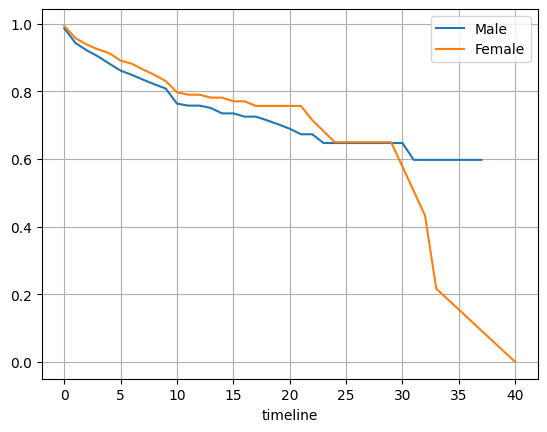

In [180]:
men_df = df[df['Gender']=='Male']
female_df = df[df['Gender']=='Female']

ax = plt.subplot()
men = kmf.fit(durations = men_df['YearsAtCompany'], event_observed=men_df['Attrition'], label='Male')
men.survival_function_.plot(ax=ax)

female = kmf.fit(durations = female_df['YearsAtCompany'], event_observed=female_df['Attrition'], label='Female')
female.survival_function_.plot(ax=ax)

ax.grid()

#### Observations
- We can observe that females have a higher probability of survival for upto the age of 30-32 after that the probability is really low. 
- But even if Males probability of surviving in the company is less as compared to Female, the Males have a higer probablitiy of staying at the same company after spending enough time at the same company. 


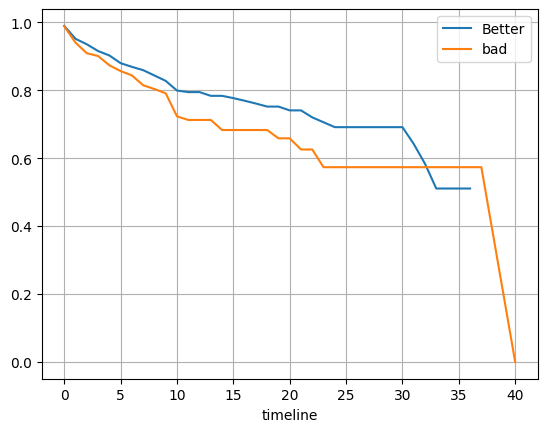

In [181]:
better_work_life = df[(df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4)]
bad_work_life = df[(df['WorkLifeBalance'] == 2) | (df['WorkLifeBalance'] == 1)]

ax = plt.subplot()
Better = kmf.fit(durations = better_work_life['YearsAtCompany'], event_observed= better_work_life['Attrition'], label='Better')
Better.survival_function_.plot(ax=ax)

bad = kmf.fit(durations = bad_work_life['YearsAtCompany'], event_observed= bad_work_life['Attrition'], label='bad')
bad.survival_function_.plot(ax=ax)

ax.grid()

#### Observations
- We can evidently observe that a good worklife balance has a lot of affect on your ability to stay in the same company for a longer period of time. 
- People with Better work life balance have a very good probability of staying, After 5 years of working the gap between the 2 probabilities start increasing.


-----------------------------------------------------------------------------------------------------------------------------------------------

## Log rank test
- This test is used to compare the survival curves of two or more groups to determine if there is a statistically significant difference between them. 
- The null hypothesis is that there is no difference in the survival experience between the groups.

In [182]:
from lifelines.statistics import logrank_test


output = logrank_test(durations_A = men_df['YearsAtCompany'],
                      durations_B = female_df['YearsAtCompany'],
                      event_observed_A = men_df['Attrition'],
                      event_observed_B = female_df['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47>

##### Observation
- Given that 0.18 is greater than the commonly used significance level of 0.05, you would typically fail to reject the null hypothesis. In other words, there isn't enough evidence to conclude that there is a statistically significant difference between the two events.
- So we can say that gender is not a very good feature to judge attrition on.

In [183]:
output = logrank_test(durations_A = bad_work_life['YearsAtCompany'],
                      durations_B = better_work_life['YearsAtCompany'],
                      event_observed_A = bad_work_life['Attrition'],
                      event_observed_B = better_work_life['Attrition'])

output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

##### Observation
- Based on this observation, you would typically conclude that there is a statistically significant difference between the two events.

-----------------------------------------------------------------------------------------------------------------------------------------------

## Cox Proportional-Hazards Model
- Cox Proportional-Hazards is a statistical model used for analyzing the survival times of individuals or entities until an event of interest occurs. The primary application of the Cox PH model is in survival analysis, where the goal is to understand the time until an event happens, such as death, failure, relapse, or any other occurrence.
- It uses partial likelihood estimation. The partial likelihood function is maximized to find the coefficients that maximize the likelihood of observing the event times in the dataset.

#### *Assumption :- The Cox PH model makes the crucial assumption that the hazard ratio is constant over time.

In [184]:
cox_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [185]:
cox_df = cox_df.drop(['Gender', 'PerformanceRating', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'HourlyRate', 'Over18', 'MonthlyRate', 'MaritalStatus', 'BusinessTravel', 'DailyRate','Department', 'EducationField', 'Education', 'YearsWithCurrManager', 'MonthlyIncome', 'YearsSinceLastPromotion'], axis=1)

In [186]:
# Fitting the model
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(cox_df, duration_col= 'YearsAtCompany', event_col = 'Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [187]:
# Lets predict for the current employees that are still the part of the company
cox_df_curr = cox_df[cox_df['Attrition'] == 0]
len(cox_df_curr)

1233

In [188]:
pred = cph.predict_survival_function(cox_df_curr, conditional_after=cox_df_curr['YearsAtCompany'])

In [207]:
pred

,1,3,4,5,6,7,8,9,10,11,...,1459,1460,1462,1463,1464,1465,1466,1467,1468,1469
0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1.0,9.732409e-01,8.928659e-01,8.813117e-01,9.861933e-01,9.956423e-01,9.406635e-01,9.407180e-01,9.963552e-01,9.750318e-01,8.339452e-01,...,9.373162e-01,8.132923e-01,9.679871e-01,8.997751e-01,9.698967e-01,9.994846e-01,9.616668e-01,8.976325e-01,9.923112e-01,9.688871e-01
2.0,9.732409e-01,6.131825e-01,7.416850e-01,9.653410e-01,9.908445e-01,8.791236e-01,9.113599e-01,9.907784e-01,9.305197e-01,7.589668e-01,...,8.854444e-01,5.551157e-01,8.957992e-01,8.518010e-01,9.441721e-01,9.985328e-01,9.055881e-01,7.862331e-01,9.883454e-01,9.423257e-01
3.0,9.218307e-01,5.045701e-01,5.618694e-01,8.992972e-01,9.843316e-01,8.015562e-01,9.113599e-01,9.725077e-01,8.786707e-01,7.589668e-01,...,7.970215e-01,3.474337e-01,7.735967e-01,8.518010e-01,8.984153e-01,9.973661e-01,7.419958e-01,6.413452e-01,9.883454e-01,8.951419e-01
4.0,8.416308e-01,5.045701e-01,4.401363e-01,8.668331e-01,9.739376e-01,6.908098e-01,8.553409e-01,9.631618e-01,8.045475e-01,6.285775e-01,...,7.004991e-01,1.690604e-01,6.254010e-01,7.633549e-01,8.452908e-01,9.955755e-01,6.691278e-01,3.264028e-01,9.804581e-01,8.404636e-01
5.0,7.963636e-01,3.415969e-01,2.802924e-01,8.668331e-01,9.648872e-01,6.061322e-01,7.690102e-01,9.631618e-01,6.006630e-01,4.582043e-01,...,5.744214e-01,1.551226e-02,6.254010e-01,6.351462e-01,7.696902e-01,9.896606e-01,6.691278e-01,2.299147e-01,9.673709e-01,7.628554e-01
6.0,7.195874e-01,1.775778e-01,1.611209e-01,8.053536e-01,9.483830e-01,4.760120e-01,7.208848e-01,9.447310e-01,5.161583e-01,3.781494e-01,...,2.974825e-01,4.492388e-03,6.254010e-01,5.680298e-01,5.641367e-01,9.866058e-01,5.441098e-01,2.299147e-01,9.595071e-01,5.532391e-01
7.0,5.969449e-01,1.193469e-01,6.879030e-02,7.118737e-01,9.285178e-01,3.538723e-01,6.403252e-01,9.146077e-01,5.161583e-01,2.659131e-01,...,2.114468e-01,4.492388e-03,6.254010e-01,4.628406e-01,4.801537e-01,9.866058e-01,3.846264e-01,1.140419e-01,9.452529e-01,4.682992e-01
8.0,4.727777e-01,5.759087e-02,4.090955e-03,6.604748e-01,8.987901e-01,2.243388e-01,5.146867e-01,8.967816e-01,3.810935e-01,1.389569e-01,...,2.114468e-01,3.763818e-04,6.254010e-01,3.173243e-01,4.801537e-01,9.805218e-01,3.115558e-01,3.518544e-02,9.195330e-01,4.682992e-01
9.0,3.313084e-01,1.503416e-02,9.460549e-04,5.756718e-01,8.068554e-01,4.948957e-02,3.918837e-01,8.649916e-01,2.291197e-01,6.181720e-02,...,1.067961e-01,5.882639e-06,6.254010e-01,1.981140e-01,3.477869e-01,9.704021e-01,2.117119e-01,1.722514e-02,8.884132e-01,3.354932e-01


#### How to read the above predictions (dataframe) ?
- The values in each cell of the DataFrame represent the estimated probability that the corresponding individual (index of individuals is the column) survives beyond the respective time point (rows). These values are between 0 and 1 (Obviously its the probability).

In [189]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1294.00
         time fit was run = 2023-12-13 04:50:39 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
Age                       -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
DistanceFromHome           0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
EnvironmentSatisfaction   -0.26       0.77       0.06            -0.38            -0.14                 0.69                 0.87
JobInvolvement            -0.34       0.71       0.09            -0.51            -0.17                 0.60                 0.84
JobLevel                  -0.27       0.77       0.12            -0.49            -0.04                 0.61                 0.96
JobRole                    0.01       1.01       0.03            -0.05             0.07                 0.96                 1.07
JobSatisfaction           -0.26       0.77       0.06            -0.38            -0.15                 0.68                 0.86
NumCompaniesWorked         0.27       1.30       0.03             0.22             0.32                 1.24                 1.37
OverTime                   1.24       3.44       0.13             0.97             1.50                 2.65                 4.47
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.15       0.86       0.06            -0.27            -0.03                 0.77                 0.97
StockOptionLevel          -0.43       0.65       0.09            -0.60            -0.25                 0.55                 0.78
TotalWorkingYears         -0.35       0.71       0.03            -0.41            -0.28                 0.66                 0.75
WorkLifeBalance           -0.17       0.84       0.09            -0.35             0.01                 0.70                 1.01

                           cmp to      z      p   -log2(p)
covariate                                                 
Age                          0.00  -0.77   0.44       1.18
DistanceFromHome             0.00   3.51 <0.005      11.12
EnvironmentSatisfaction      0.00  -4.33 <0.005      16.06
JobInvolvement               0.00  -3.96 <0.005      13.69
JobLevel                     0.00  -2.28   0.02       5.47
JobRole                      0.00   0.38   0.71       0.50
JobSatisfaction              0.00  -4.42 <0.005      16.60
NumCompaniesWorked           0.00  10.39 <0.005      81.55
OverTime                     0.00   9.22 <0.005      64.84
PercentSalaryHike            0.00  -0.36   0.72       0.47
RelationshipSatisfaction     0.00  -2.49   0.01       6.30
StockOptionLevel             0.00  -4.77 <0.005      19.03
TotalWorkingYears            0.00 -10.91 <0.005      89.63
WorkLifeBalance              0.00  -1.87   0.06       4.04
---
Concordance = 0.88
Partial AIC = 2616.01
log-likelihood ratio test = 560.24 on 14 df
-log2(p) of ll-ratio test = 364.81

#### Goodness of fit (Used to compare the models)
- Log likelihood :- The log-likelihood correctly handles any type of censoring, and is precisely what we are maximizing in the model training. 
    - Higher is better
- Partial AIC:- AIC is a great metric for comparing models as it relies on the log-likelihood. 
    - lower is better
- Concordance Index - This measure evaluates the accuracy of the ranking of predicted time. It is in fact a generalization of AUC, another common loss function, and is interpreted similarly:
    - 0.5 is the expected result from random predictions
    - 1.0 is perfect concordance
    - 0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

<Axes: xlabel='log(HR) (95% CI)'>

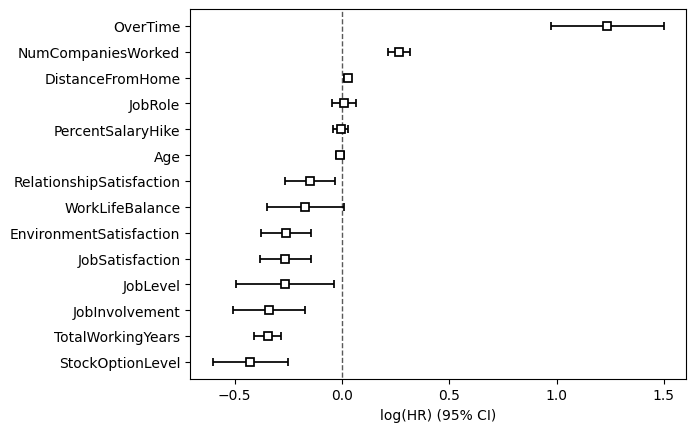

In [190]:
#Plotting the coefficients
cph.plot()

In [191]:
cph.check_assumptions(cox_df)

Proportional hazard assumption looks okay.


[]

#### What to look for in the above graph?
- A smaller spread (or lower variability) of a coefficient suggests that the estimate is relatively stable and precise. 
- It indicates that the model is confident in the impact of that particular variable on the hazard rate (event occuring).
- If the interval does not include zero, it supports the significance of the variable.
- A positive coefficient indicates an increased hazard (higher risk), while a negative coefficient indicates a decreased hazard (lower risk) for the corresponding covariate.
